<a href="https://colab.research.google.com/github/hamagami/is2021/blob/main/NN_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network implementation by framework

In [2]:
!pip install tensorflow numpy mnist #install minist module

In [19]:
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## loading minst handwritten digit images and it's labels 

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
# Normalize the images. 
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [5]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [6]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [7]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [21]:
# Train the model.
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1290 - accuracy: 0.9633
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1193 - accuracy: 0.9656
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9672
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1033 - accuracy: 0.9703
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1045 - accuracy: 0.9711
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9717
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0948 - accuracy: 0.9732
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.097

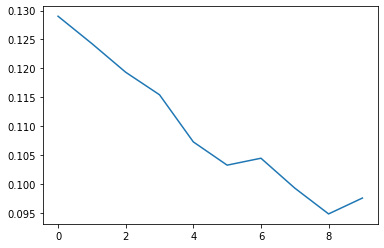

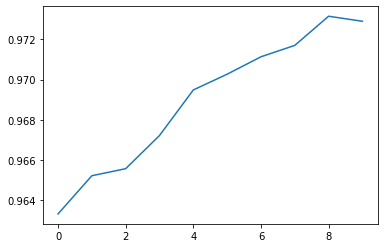

In [22]:
plt_train = history.history['loss']
plt_acc =  history.history['accuracy']
plt.plot(plt_train)
plt.show()
plt.plot(plt_acc)
plt.show()

In [9]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.2440 - accuracy: 0.9390


[0.24400004744529724, 0.9390000104904175]

In [11]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]
[7 2 1 0 4]
